<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
from skimage.io import imread_collection
import cv2
import seaborn as sns
import scipy.stats as sc
import os

In [96]:
def gray_to_rgb(image):
    if len(image.shape) == 2:
        return skimage.color.gray2rgb(image)
    else:
        return image


def read_organize_data(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    label_list = next(os.walk(file_path))[1]
    label_list.sort()
    label_dict = {}
    for i in range(20):
        label_dict[i] = label_list[i]
    labels = list(label_dict.values())
    return_db = pd.DataFrame(columns = ['Pictures', 'Label','Encoding', 'File_Path'])
    for enc, label in label_dict.items():
        path = os.path.join(os.getcwd(),file_path + '/' + label)
        file_path_list = [path + '/' + x for x in os.listdir(path)]
        sub_db = pd.DataFrame()
        sub_db['Pictures'] = list(imread_collection(file_path_list))
        sub_db['Label'] = label
        sub_db['Encoding'] = enc
        sub_db['File_Path'] = file_path_list
        return_db = pd.concat([return_db, sub_db])
    return_db = return_db.reset_index()
    return_db['Pictures'] = return_db['Pictures'].apply(gray_to_rgb)
    return return_db
    

In [58]:
starting_data = read_organize_data('20_categories_training/20_categories_training')
starting_data.head()

,index,Pictures,Label,Encoding,File_Path
0,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...
1,1,"[[[88, 56, 17], [95, 63, 24], [101, 69, 30], [...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...
2,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...
3,3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...
4,4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...


In [91]:

def img_size(image):
    return image.size
# Returns the pixel size of the image
def img_red_ch(image):
    if len(image.shape) == 2:
        return 0
    else:
        return image[:,:,0].mean()

def img_red_std(image):
    if len(image.shape) == 2:
        return 0
    else:
        return image[:,:,0].std()

def img_red_skew(image):
    return sc.skew(image[:,:,0].ravel(), nan_policy = 'omit')

def img_red_kurt(image):
    return sc.kurtosis(image[:,:,0].ravel(), nan_policy = 'omit')
    
def img_green_ch(image):
    if len(image.shape) == 2:
        return 0
    else:
        return image[:,:,1].mean()

def img_green_std(image):
    if len(image.shape) == 2:
        return 0
    else:
        return image[:,:,1].std()

def img_green_skew(image):
    return sc.skew(image[:,:,1].ravel(), nan_policy = 'omit')

def img_green_kurt(image):
    return sc.kurtosis(image[:,:,1].ravel(), nan_policy = 'omit')


def img_blue_ch(image):
    if len(image.shape) == 2:
        return 0
    else:
        return image[:,:,2].mean()
    
    
def img_blue_std(image):
    if len(image.shape) == 2:
        return 0
    else:
        return image[:,:,2].std()

def img_blue_skew(image):
    return sc.skew(image[:,:,2].ravel(), nan_policy = 'omit')

def img_blue_kurt(image):
    return sc.kurtosis(image[:,:,2].ravel(), nan_policy = 'omit')

# Returns the average of the red-channel pictures for the images
def img_asp(image):
    return image.shape[0]/image.shape[1]
#Returns the aspect ratio of the image



# Average gray intensity

def img_gray_int(image):
    gray = skimage.color.rgb2gray(image)
    return gray.mean()

def img_gray_std(image):
    gray = skimage.color.rgb2gray(image)
    return gray.std()

def img_gray_skew(image):
    gray = skimage.color.rgb2gray(image)
    return sc.skew(gray.ravel(), nan_policy = 'omit')

def img_gray_kurt(image):
    gray = skimage.color.rgb2gray(image)
    return sc.kurtosis(gray.ravel(), nan_policy = 'omit')

In [89]:
def img_red_skew(image):
    return sc.skew(image.ravel())
img_red_kurt(img)

-0.0091672160820786

 We expect all external sources sited, and significant indication of EDA. 

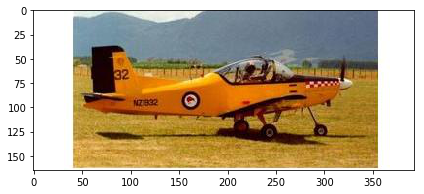

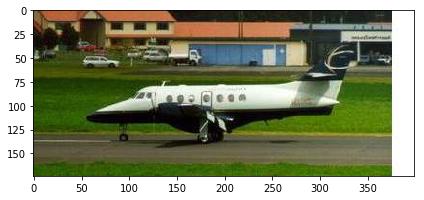

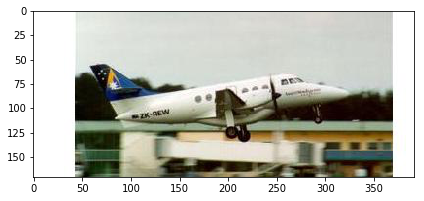

In [5]:
skimage.io.imshow(starting_data.loc[0,'Pictures'])
plt.show()
io.imshow(starting_data.loc[1,'Pictures'])
plt.show()
io.imshow(starting_data.loc[2,'Pictures'])
plt.show()

## Harris

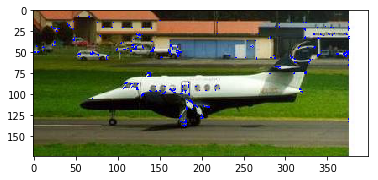

In [67]:
img = starting_data.loc[1,'Pictures'].copy()
gr = skimage.color.rgb2grey(img)
gr = np.float32(gr)
dst = cv2.cornerHarris(gr,2,3, 0.04)
img[dst>0.01*dst.max()]=[0,0,255]
#cv2.imshow('dst',img)

plt.imshow(img)

In [53]:
img.shape

(174, 399, 3)

## SHin tomasi

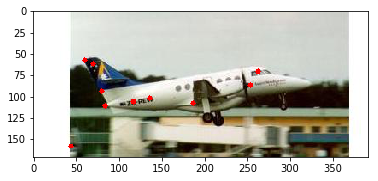

10

In [64]:
img = starting_data.loc[2,'Pictures'].copy()
gray = skimage.color.rgb2grey(img)
gray = np.float32(gray)
corners = cv2.goodFeaturesToTrack(gray,10,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()
len(corners)

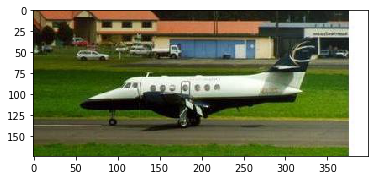

In [57]:
img = starting_data.loc[1,'Pictures']
plt.imshow(img)

In [92]:
starting_data['image_size'] = starting_data['Pictures'].apply(img_size)
starting_data['red_ch_intensity'] = starting_data['Pictures'].apply(img_red_ch)
starting_data['green_ch_intensity'] = starting_data['Pictures'].apply(img_green_ch)
starting_data['blue_ch_intensity'] = starting_data['Pictures'].apply(img_blue_ch)
starting_data['gray_intensity'] = starting_data['Pictures'].apply(img_gray_int)
starting_data['aspect_ratio'] = starting_data['Pictures'].apply(img_asp)
starting_data['red_ch_std'] = starting_data['Pictures'].apply(img_red_std)
starting_data['green_ch_std'] = starting_data['Pictures'].apply(img_green_std)
starting_data['blue_ch_std'] = starting_data['Pictures'].apply(img_blue_std)
starting_data['gray_std'] = starting_data['Pictures'].apply(img_gray_std)
starting_data['red_ch_skew'] = starting_data['Pictures'].apply(img_red_skew)
starting_data['green_ch_skew'] = starting_data['Pictures'].apply(img_green_skew)
starting_data['blue_ch_skew'] = starting_data['Pictures'].apply(img_blue_skew)
starting_data['gray_skew'] = starting_data['Pictures'].apply(img_gray_skew)
starting_data['red_ch_kurt'] = starting_data['Pictures'].apply(img_red_kurt)
starting_data['green_ch_kurt'] = starting_data['Pictures'].apply(img_green_kurt)
starting_data['blue_ch_kurt'] = starting_data['Pictures'].apply(img_blue_kurt)
starting_data['gray_kurt'] = starting_data['Pictures'].apply(img_gray_kurt)

starting_data['low_contrast'] = starting_data['Pictures'].apply(lambda x: skimage.exposure.is_low_contrast(x,fraction_threshold=0.4))
starting_data['low_contrast'] = starting_data['low_contrast'].astype(int)
starting_data.head()

,index,Pictures,Label,Encoding,File_Path,image_size,red_ch_intensity,green_ch_intensity,blue_ch_intensity,gray_intensity,...,gray_std,red_ch_skew,green_ch_skew,blue_ch_skew,gray_skew,red_ch_kurt,green_ch_kurt,blue_ch_kurt,gray_kurt,low_contrast
0,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...,194535,170.123787,147.788681,111.753798,0.587987,...,0.258755,-0.259019,0.106323,0.441830,0.157973,-0.904141,-0.344178,-1.202180,-0.348619,0
1,1,"[[[88, 56, 17], [95, 63, 24], [101, 69, 30], [...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...,208278,98.426973,104.499870,67.531631,0.394290,...,0.247674,0.961537,0.927138,1.355689,1.031927,-0.028547,0.506824,0.862590,0.574022,0
2,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...,201096,174.865318,175.592150,163.577814,0.684594,...,0.307039,-0.914682,-0.959822,-0.788366,-0.930180,-0.571888,-0.473785,-0.844127,-0.541991,0
3,3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...,221352,210.739822,189.280101,164.805242,0.753238,...,0.268585,-1.962853,-1.597588,-1.268777,-1.562897,3.212088,1.282528,0.636470,1.294783,0
4,4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...,166662,147.548565,155.967905,127.917054,0.596691,...,0.293273,-0.204144,-0.325232,-0.214351,-0.263015,-1.371266,-1.278711,-1.665865,-1.387016,0


In [93]:
#starting_data['low_contrast'] = starting_data['Pictures'].apply(lambda x: skimage.exposure.is_low_contrast(x,fraction_threshold=0.4))
#starting_data['low_contrast'] = starting_data['low_contrast'].astype(int)
starting_data['low_contrast'].sum()

506

In [94]:
len(starting_data)

1501

In [95]:
sub = starting_data[starting_data['low_contrast'] == 1]
sub['Label'].value_counts()

leopards        63
comet           55
gorilla         36
unicorn         35
dolphin         33
teddy-bear      25
kangaroo        23
penguin         22
llama           22
porcupine       22
bear            21
blimp           21
crab            20
killer-whale    20
goat            19
triceratops     19
giraffe         17
zebra           17
dog             16
Name: Label, dtype: int64

### Grayscale exception

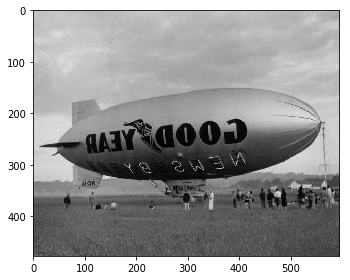

(477, 595, 3)

In [62]:
img = starting_data.loc[180,'Pictures'].copy()
io.imshow(img)
plt.show()
skimage.exposure.is_low_contrast(img)
img.shape

### Pixel Intensity Histograms

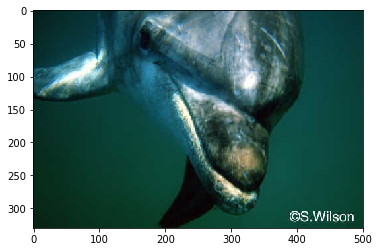

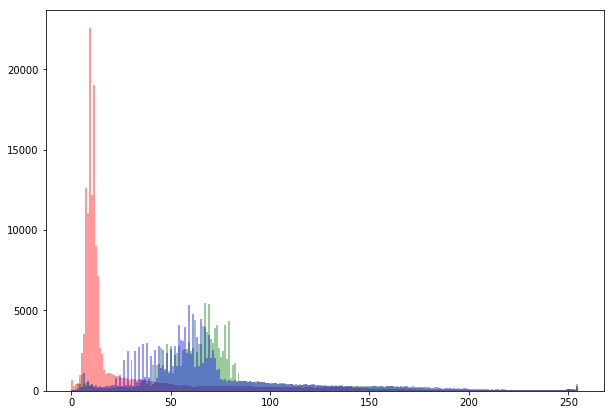

In [19]:
img = starting_data.loc[420,'Pictures'].copy()
gray = skimage.color.rgb2grey(img)
#histo = cv2.calcHist([img], )
plt.imshow(img)
plt.show()
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]
plt.figure(figsize = (10,7))
sns.distplot(red.ravel(), color='red', bins = 256, kde = False)
sns.distplot(green.ravel(), color='green', bins = 256, kde = False)
sns.distplot(blue.ravel(), color='blue', bins = 256, kde = False)
plt.show()

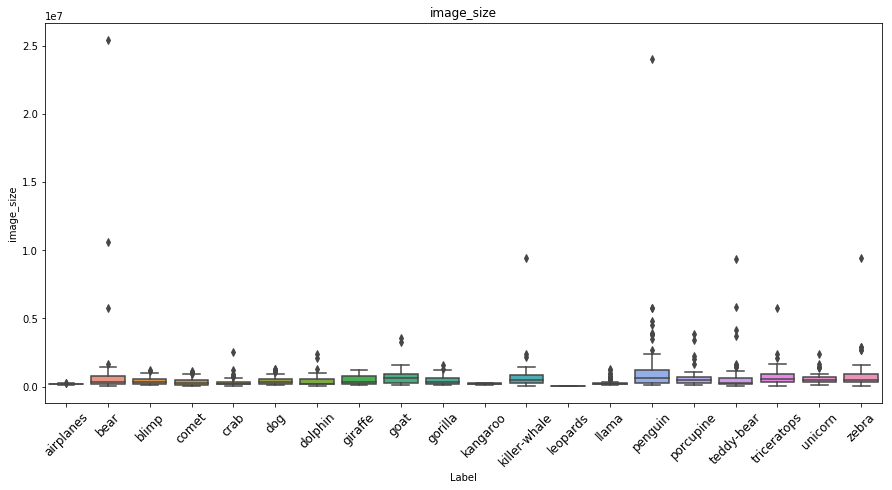

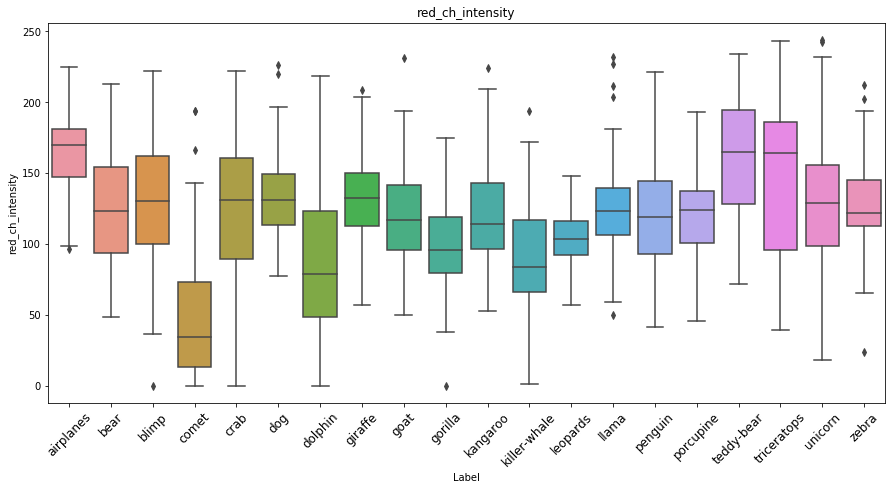

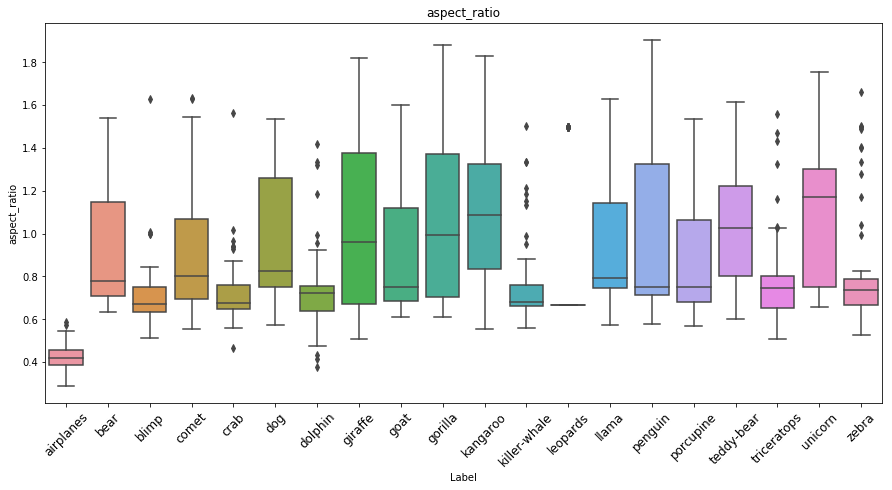

In [12]:
for ft in ['image_size', 'red_ch_intensity', 'aspect_ratio']:
    plt.figure(figsize = (15,7))
    sns.boxplot(x = 'Label', y = ft, data = starting_data)
    plt.xticks(rotation = 45, size = 'large')
    plt.title(ft)
    plt.show()

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [2]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [3]:
feature_frame(data_from_nb1)

NameError: name 'starting_data' is not defined